In [32]:
import requests
import xml.etree.ElementTree as ET
import dicttoxml
import json
import matplotlib.pyplot as plt

# Submission by P.T.C.M. Tholhuijsen | ID: 1237447

# Introduction to knowledge graphs

In this assignment, we set the stage for the group project of 2AMD20. Through some small exercises, we introduce you to our expectations of the project. There are four parts, which correspond to the four requirements you can choose from in the group assignment: 
* Knowledge graphs and modeling (mandatory)
* Data quality and cleaning
* Data exchange
* Visual analytics

**All four parts are required in this mini-assignment, such that you can get a feel for what each of them means.**

# 1. Knowledge graphs
The first requirement for the group assignment is that you use knowledge graphs. This means that you use data in a graph format, preferably RDF, and its corresponding query language. In this mini-assignment, we will use XML, so that you have more time to get used to RDF and SPARQL.

We have prepared a dataset for you, but you may also add download/query/import extra data for this assignment. The data file we have prepared comes from a news api, which gathers news from "over 80,000 large and small news sources and blogs". We have searched for articles about Football, in the languages of all the countries where football is most popular.

In [2]:
# We can open XML data from a file.

tree = ET.parse('football_id.xml')
data = tree.getroot()

# To help you identify the articles, here are the keywords we used.
used_keywords = {
    'England': 'football',
    'Netherlands': 'voetbal',
    'USA': 'soccer',
    'Brazil/Portugal': 'futebol',
    'Germany': 'fussball',
    'Italian': 'calcio',
    'Spain/Argentina/Uruguay': 'fútbol',
    'France': 'le foot',
    'european': 'uefa',
    'world': 'fifa'
}


In [3]:
# If you want, you can retrieve news data from news api, 
# after you get your own apikey by creating an account: https://newsapi.org/docs/endpoints/everything

apikey = '75215571c869441990023f2d230e55a9' 
keyword = 'fifa'

r = requests.get('https://newsapi.org/v2/everything?q=' + keyword + '&sortBy=relevancy&page=1&apiKey=' + apikey)
json_data = json.loads(r.content)['articles']

xml_data = dicttoxml.dicttoxml(json_data, return_bytes=False)
data = ET.fromstring(xml_data)



In [4]:
# The structure of the data is as follows: 

print(ET.tostring(data[0]).decode())

<item type="dict"><source type="dict"><id type="str">google-news</id><name type="str">Google News</name></source><author type="null" /><title type="str">Paratici appeals worldwide football ban to FIFA - Reuters</title><description type="str">Paratici appeals worldwide football ban to FIFA&#160;&#160;Reuters</description><url type="str">https://consent.google.com/ml?continue=https://news.google.com/rss/articles/CBMiYWh0dHBzOi8vd3d3LnJldXRlcnMuY29tL2xpZmVzdHlsZS9zcG9ydHMvcGFyYXRpY2ktYXBwZWFscy13b3JsZHdpZGUtZm9vdGJhbGwtYmFuLWZpZmEtMjAyMy0wNC0xMS_SAQA?oc%3D5&amp;gl=FR&amp;hl=en-US&amp;cm=2&amp;pc=n&amp;src=1</url><urlToImage type="null" /><publishedAt type="str">2023-04-11T11:19:00Z</publishedAt><content type="str">We use cookies and data to&lt;ul&gt;&lt;li&gt;Deliver and maintain Google services&lt;/li&gt;&lt;li&gt;Track outages and protect against spam, fraud, and abuse&lt;/li&gt;&lt;li&gt;Measure audience engagement and site statistics to unde&#8230; [+1131 chars]</content></item>


In [5]:
# Articles have the following attributes: id, author, title, description, 
# url, urlToImage, publishedAt, content

# We can access details about an article as follows:

# print(data[0].attrib['id']) # This one doesn't work
print(data[0].find('source').find('id').text)
print(data[0].find('source').find('name').text)
print(data[0].find('author').text)
print(data[0].find('title').text)
print(data[0].find('description').text)
print(data[0].find('url').text)
print(data[0].find('publishedAt').text)
print(data[0].find('content').text)

google-news
Google News
None
Paratici appeals worldwide football ban to FIFA - Reuters
Paratici appeals worldwide football ban to FIFA  Reuters
https://consent.google.com/ml?continue=https://news.google.com/rss/articles/CBMiYWh0dHBzOi8vd3d3LnJldXRlcnMuY29tL2xpZmVzdHlsZS9zcG9ydHMvcGFyYXRpY2ktYXBwZWFscy13b3JsZHdpZGUtZm9vdGJhbGwtYmFuLWZpZmEtMjAyMy0wNC0xMS_SAQA?oc%3D5&gl=FR&hl=en-US&cm=2&pc=n&src=1
2023-04-11T11:19:00Z
We use cookies and data to<ul><li>Deliver and maintain Google services</li><li>Track outages and protect against spam, fraud, and abuse</li><li>Measure audience engagement and site statistics to unde… [+1131 chars]


# 2. Data quality and cleaning (4 points)

One of the three possible dimensions in the group assignment is improving the quality of your data. The dataset we provide is relatively clean, so another way to improve the quality is to extend it. 

In order to practice with data quality, write a script to add the country of origin of the news article. You can consider using the keywords in the `used_keywords`, the tld of the urls, or some other dimension of the data.

In [6]:
# Put your code here, add as many cells as you like.

In [7]:
# The idea:
#  For each country, search on a keyword (soccer in native language)
#  Add a column with the country of that keyword. 
#  Combine all the datasets

all_data_list = list()
for country, local_ball_name in used_keywords.items():
    r = requests.get(f'https://newsapi.org/v2/everything?q={local_ball_name}&sortBy=relevancy&page=1&apiKey=' + apikey)
    json_data = json.loads(r.content)['articles']

    for i in json_data:
        i['country'] = country
    
    all_data_list.extend(json_data)

xml_data = dicttoxml.dicttoxml(all_data_list, return_bytes=False)
data = ET.fromstring(xml_data)

In [8]:
print(data[0].find('country').text)

England


# 3. Data exchange (4 points)

Another dimension of the group assignment is data exchange. In order to practice this, we want you to figure out which individual or football team is the subject of the data, and which country this club is located in. Given the time constraint for this assignment, your analysis does not have to be complete, but please make a good effort to extract some of this data.

You might want to find another data source to help you with this. Consider using wikidata, dbpedia or a more domain-specific resource.


In [7]:
# Put your exchange code here, add as many cells as you like.

In [9]:
# Add new data. Player data and club data.
player_tree = ET.parse('player_data.xml')
club_tree = ET.parse('club_data.xml')
player_data = player_tree.getroot()
club_data = club_tree.getroot()

club_dict = dict()

import csv
with open("clubs.csv", encoding="utf8") as cf:
    r = csv.reader(cf)
    next(r)
    for row in r:
        club_dict.update({row[1]: row[2]})

In [10]:
# Example
print(player_data.find("PlayerData").find("P").attrib["s"])
print(club_data.find("ClubData").find("C").attrib["n"])

HOYTE
Arsenal


In [11]:
import re

# Match player names and club names in the title of the dataset.
for i in data:
    # Take the article title
    article_title = i.find("title").text.lower()
    
    # Remove all the special characters by splitting on them and separating the words in a list
    article_title_list = re.split(r"[^a-zA-Z0-9\s]", article_title)
    
    # Convert this list to a single string object and remove all spaces
    article_title_str = "".join([i.replace(" ", "") for i in article_title_list.copy()])
    subject = ""
    subject_country = "Unknown"
    
    for p_t in player_data[0]:
        surname = p_t.attrib["s"]
        
        if surname.lower().replace(" ", "") in article_title_str:
            subject = f"Player: {surname}"
            break
            
    for c_t in club_data[0]:
        clubname = c_t.attrib["n"]
        
        if clubname.lower().replace(" ", "") in article_title_str:
            try:
                subject = f"{clubname}"
                subject_country = club_dict[clubname]
            except KeyError:
                subject = f"{clubname}"
            break
    
    i.set("subject", subject)
    i.set("subject_country", subject_country)


In [12]:
# Proof that it works
print(data[0].attrib['subject'])
print(data[0].attrib['subject_country'])
print(data[0].find('title').text)

Manchester United
England
Football Daily | Manchester United’s inability to handle the hotter kitchens in football


# 4. Data visualization (2 points)
We are wondering if the news sources discuss mostly their national football club, or if they also talk about other clubs.

Make an interactive plot that shows the relation between a news articles origin country and the topic that they talk about. It needs to include an informative tooltip.

You can select whichever visualization library you prefer, note that it is also possible to run JS' d3 in Jupyter notebooks.

In [8]:
# Put your visualization code here, add as many cells as you like.

15

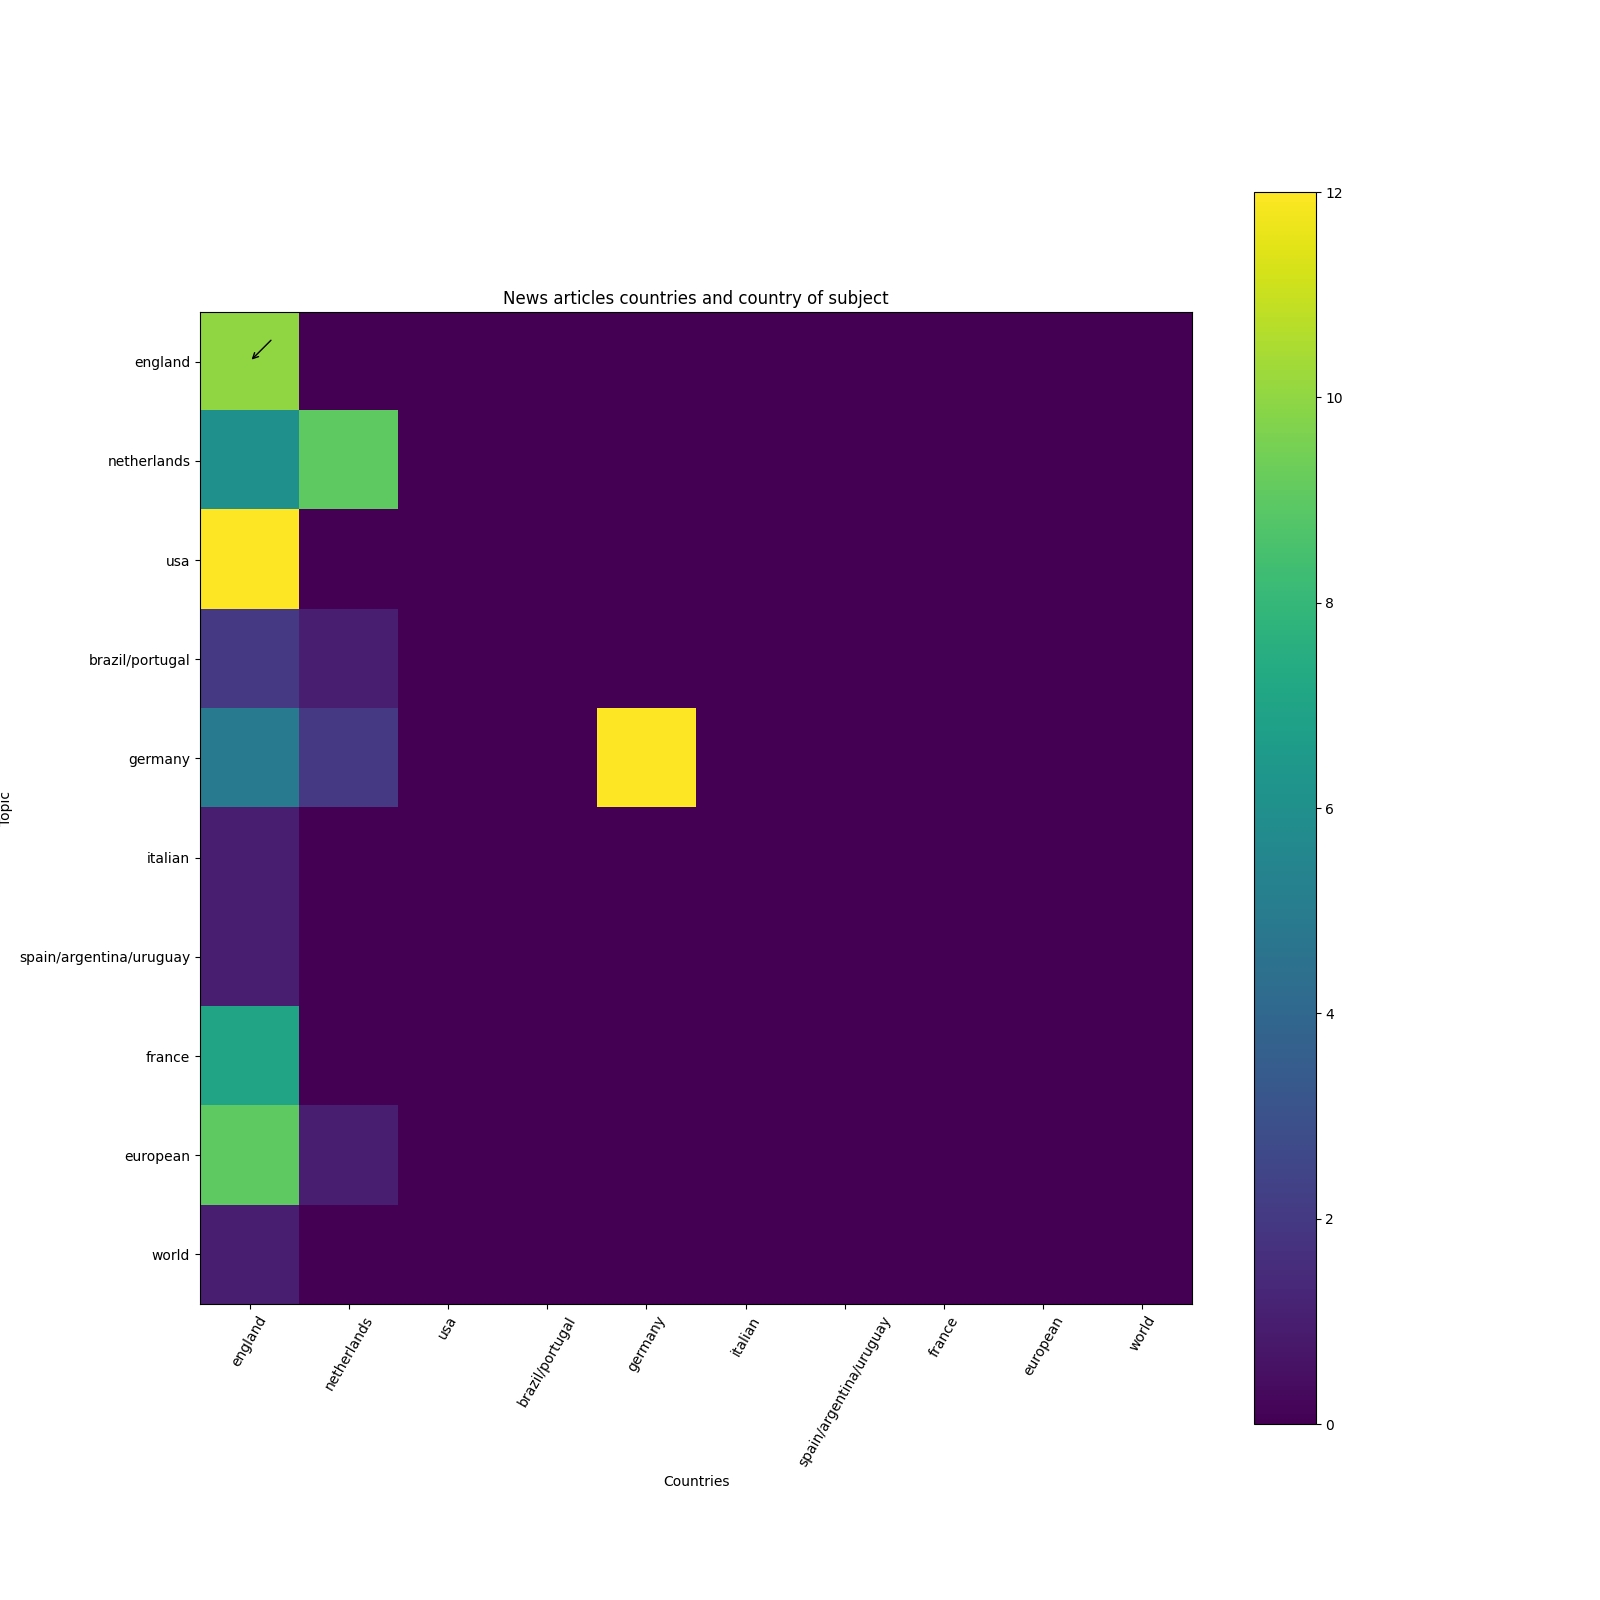

In [31]:
import numpy as np
%matplotlib widget

countries_list = [i.lower() for i in used_keywords.keys()]
counts = np.zeros((len(countries_list), len(countries_list)))

for i in data:
    try:
        col_inx = countries_list.index(i.find('country').text.lower())
        row_inx = countries_list.index(i.attrib['subject_country'].lower())

        counts[col_inx][row_inx] += 1
    except ValueError:
        continue

fig, ax = plt.subplots(figsize=(16,16))
im = ax.imshow(counts)
ax.set_xlabel("Countries")
ax.set_ylabel("Topic")
ax.set_xticks(np.arange(len(countries_list)))
ax.set_yticks(np.arange(len(countries_list)))
ax.set_xticklabels(countries_list, rotation=60)
ax.set_yticklabels(countries_list)
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_title('News articles countries and country of subject')

# Made this interactive aspect with help from the matplotlib documentation.
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible = False


def hover(event):
    x, y = event.xdata, event.ydata
    annot.xy = (x, y)
    annot.set_text(f"{countries_list[abs(round(x))]}, {countries_list[abs(round(y))]}")
    annot.set_visible = True
    
fig.canvas.mpl_connect("motion_notify_event", hover)


# It can be seen that this definitely doesn't have perfect results.
# The problems are caused by a lack of a good dataset for club&country and their contries.
#  1. If the subject is a player, no country was registered.
#  2. Sometimes the subject is unknown. 
#  3. String parsing to discover the subject is not ideal.